In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from patsy import dmatrices, dmatrix
%matplotlib inline

# 1. Categorical predictors #

In [2]:
# data from ISL book: https://trevorhastie.github.io/ISLR/data.html
df = pd.read_csv("Auto.csv")
df.columns    

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [3]:
# default data types
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


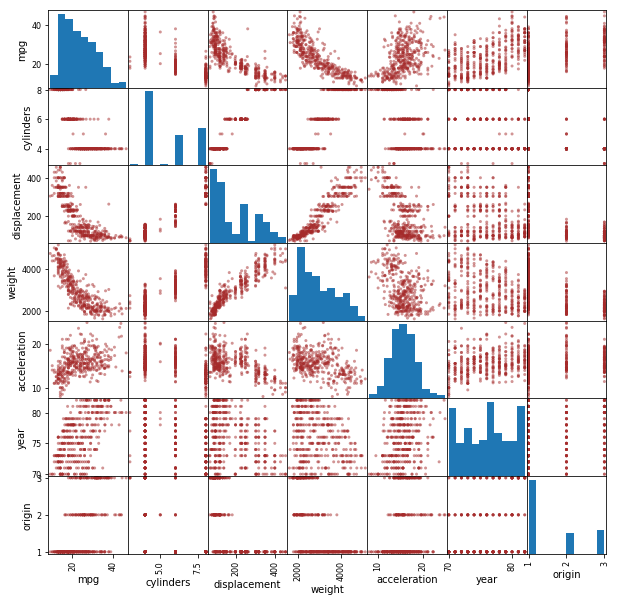

In [20]:
# some columns contain categorical data
# scatter_plot 
_ = pd.plotting.scatter_matrix(df, color="brown",figsize=(10,10),)

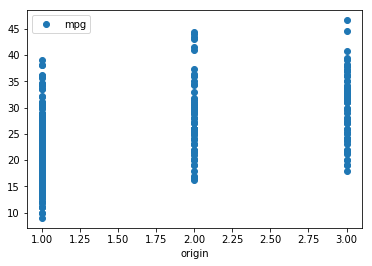

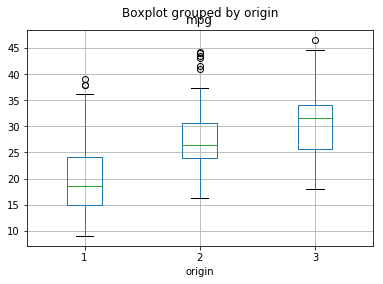

In [21]:
# use box-plot for categorical data 
# if results in categories are substantially difrent that feature might be important
_ = df.plot(x="origin", y="mpg", style='o')
_ = df.boxplot(column="mpg", by="origin") 

In [74]:
# dmatrices function splits and encodes data
# ''-1'' to have a model without the intercept
#models = [
#    'mpg ~ origin',
#    'mpg ~ C(origin)'
#    'mpg ~ C(origin) - 1',
#]
y, X = dmatrices('mpg ~ origin', data=df, return_type='dataframe') 
model = sm.OLS(y, X) 
result = model.fit() 
X.dtypes

Intercept    float64
origin       float64
dtype: object

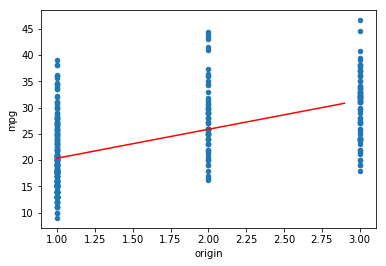

In [23]:
# we might treat categorical data as numerical but if would have diffrent meaning

# scatter-plot data
ax = df.plot(x='origin', y='mpg', kind='scatter')

# plot regression line on the same axes
p = result.params
x = np.arange(1, 3, 0.1)
ax = ax.plot(x, p.Intercept + p.origin  * x, 'r' )



In [9]:
# indicate which columns should be treated as categorical
df_cat = df.astype({'origin': 'category'})
df_cat.dtypes

mpg              float64
cylinders          int64
displacement     float64
horsepower        object
weight             int64
acceleration     float64
year               int64
origin          category
name              object
dtype: object

In [36]:
# dmatrices encodes categorical data in 'one-hot' style
# diffrent type of encodings -> see e.g. http://pbpython.com/categorical-encoding.html
y, X = dmatrices('mpg ~ weight + origin  ', data=df_cat, return_type='dataframe') 
X.dtypes
X.head()

# you might also use function 'C()' for indicating categorical variabel
# y, X = dmatrices('mpg ~ C(cylinders) -1 ', data=df, return_type='dataframe') 

,Intercept,origin[T.2],origin[T.3],weight
0,1.0,0.0,0.0,3504.0
1,1.0,0.0,0.0,3693.0
2,1.0,0.0,0.0,3436.0
3,1.0,0.0,0.0,3433.0
4,1.0,0.0,0.0,3449.0


In [63]:
#We can also have other encoding
df_usa = pd.get_dummies(df, columns=["origin"])
df_usa.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,name,origin_1,origin_2,origin_3
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,ford torino,1,0,0


In [66]:
#coding of categorical predictors has no influance on results
yy, XX = dmatrices('mpg ~ origin_1', data=df_usa, return_type='dataframe') 
model = sm.OLS(yy, XX) 
result = model.fit() 
p = result.params
p.Intercept, p.origin_1,p.Intercept + p.origin_1


(29.248322147651013, -9.176547954102615, 20.0717741935484)

In [ ]:
#change coding
df_usa["origin_1"].replace({0: -1},inplace=True)
df_usa["origin_1"]


In [68]:
#coding of categorical predictors has no influance on results
yy, XX = dmatrices('mpg ~ origin_1', data=df_usa, return_type='dataframe') 
model = sm.OLS(yy, XX) 
result = model.fit() 
p = result.params
p.Intercept, p.origin_1,p.Intercept + p.origin_1

(24.66004817059969, -4.588273977051303, 20.071774193548386)

In [ ]:
#go to the orginal one-hot coding
df_usa["origin_1"].replace({-1: 0},inplace=True)
df_usa["origin_1"]

# 2. Categorical response - classification setting #

In [41]:
# Let us try to predict if a car is from USA (origin = 1)
# Preper the data
y, X = dmatrices('origin_1 ~ weight + displacement - 1 ', df_usa, return_type = 'dataframe')

# Use statsmodels logistic regression
logit = sm.Logit(y, X)
result = logit.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.294936
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.554     
Dependent Variable: origin_1         AIC:              238.1792  
Date:               2020-11-04 13:17 BIC:              246.1471  
No. Observations:   397              Log-Likelihood:   -117.09   
Df Model:           1                LL-Null:          -262.70   
Df Residuals:       395              LLR p-value:      2.6832e-65
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
weight        -0.0049    0.0006  -7.6923  0.0000  -0.0062  -0.0037
displacement   0.0955    0.0128   7.4538  0.0000   0.0704   0.1207
=================================================================

"""

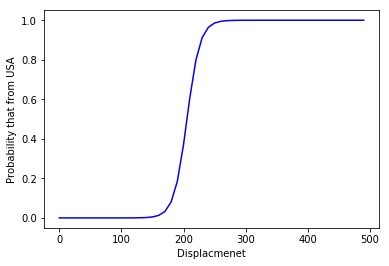

In [23]:
# Let us plot fitted line

def predict_prob_USA(model, displacement):
    return model.predict([weight, displacement])

# X.describe()

weight = 4000              # that is ~ 1800 kg
dis = np.arange(0,500,10)  # 200 cubic inches ~ 3,2 l
prob_usa = np.array( [predict_prob_USA(result,weight,di) for di in dis])
_ = plt.plot(dis, prob_usa, 'b' )
_ = plt.ylabel("Probability that from USA")
_ = plt.xlabel("Displacmenet")


Optimization terminated successfully.
         Current function value: 0.549956
         Iterations 9


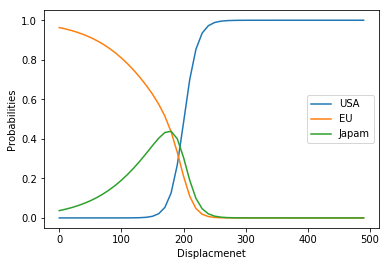

In [44]:
# Let us plot logistict regression line for each case (USA, EU, Japan)

# First we build the model with MNLogit function from statmodels package
y, X = dmatrices('origin ~ weight + displacement - 1 ', df, return_type = 'dataframe')
model=sm.MNLogit(y,X)
result = model.fit()
#result.summary2()

# Then we plot using result.predict() function
weight = 4000              # that is ~ 1800 kg
dis = np.arange(0,500,10)  # 200 cubic inch ~ 3,2 l
prob = np.array( [result.predict([weight, di]) for di in dis])
ax = plt.plot(dis, prob.reshape(50,3))
_ = plt.ylabel("Probabilities")
_ = plt.xlabel("Displacmenet")
_ = plt.legend(iter(ax), ('USA', 'EU', 'Japam'))



In [47]:
#fit coef. by maximazing log-likelihood
?sm.MNLogit.fit()

In [48]:
# To test the model we will use sklearn package - 
# in practice it has more convinient methods (e.g. for metrics)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix

# Split the data into training (80%) and validation set (20%)
mask = np.random.rand(len(df)) < 0.8
train = df[mask]
valid = df[~mask]
        
# Prepare the data 
model_formula = 'origin ~ weight + displacement + cylinders '
y_train, X_train = dmatrices(model_formula, data=train, return_type='dataframe')   
y_valid, X_valid = dmatrices(model_formula, data=valid, return_type='dataframe')

# sklearn output, set  C = 1e9 to avoid regularization
model = LogisticRegression(fit_intercept = False, C = 1e9)
y_train = np.array(y_train).reshape(len(y_train,))
result = model.fit(X_train, y_train)

# accuracy of our prediction on validation set
print("Training accuracy: ", accuracy_score(y_train, model.predict(X_train)))

# Log_loss on validation set -> we use  model.predict_proba() 
print("Training log-loss", log_loss(y_train, model.predict_proba(X_train)))

# accuracy of our prediction on validation set
print("Validation accuracy: ", accuracy_score(y_valid, model.predict(X_valid)))

# accuracy of our prediction on validation set
print("Confusion_matrix: \n", confusion_matrix(y_valid, model.predict(X_valid)))

Training accuracy:  0.7286585365853658
Training log-loss 0.5441817164933143
Validation accuracy:  0.7681159420289855
Confusion_matrix: 
 [[39  2  3]
 [ 1  6  5]
 [ 3  2  8]]


In [50]:
#logistic loss = cross-entropy = - log-likelihood
?log_loss

## Decision Boundries for  linearly separable data ##
![title](fig/1.png)
![title](fig/2.png)
## Decision Boundries for  data that are note linearly separable ##
![title](fig/3.png)

# 3. Decision Tree Classifier #

![title](fig/tree.png)

In [31]:
from sklearn import tree

model = tree.DecisionTreeClassifier(criterion="entropy")
result = model.fit(X_train, y_train)

# accuracy of our prediction on validation set
print("Training accuracy: ", accuracy_score(y_true=y_train, y_pred=model.predict(X_train)))

# Log_loss on validation set -> we use  model.predict_proba() 
print("Training log-loss", log_loss(y_train, model.predict_proba(X_train)))

# accuracy of our prediction on validation set
print("Validation accuracy: ", accuracy_score(y_true=y_valid, y_pred=model.predict(X_valid)))

# accuracy of our prediction on validation set
print("Confusion_matrix: \n", confusion_matrix(y_true=y_valid, y_pred=model.predict(X_valid)))

Training accuracy:  0.9937694704049844
Training log-loss 0.01026740456699377
Validation accuracy:  0.868421052631579
Confusion_matrix: 
 [[49  2  1]
 [ 2  8  3]
 [ 0  2  9]]


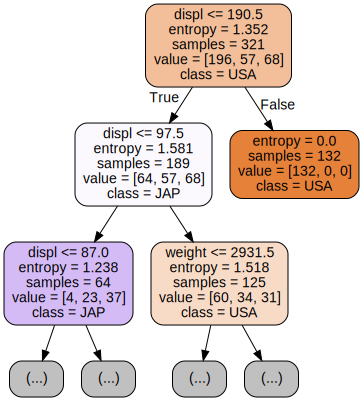

In [32]:
# We can see the tre, but You need to install graphviz 
# see e.g. https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft

import graphviz 
dot_data = tree.export_graphviz(result, out_file=None, filled=True, rounded=True, max_depth=2, class_names=['USA','EU','JAP'], feature_names=['int','weight','displ', 'cylin'])
graph = graphviz.Source(dot_data) 
graph